In [75]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture as GMM
from sklearn import preprocessing

In [76]:
CATEGORIES = ['business', 'entertainment', 'politics', 'sport', 'tech']
stop_words = set(stopwords.words("english")) 

In [77]:
def load_corpus(path):
    if not os.path.exists(path):
        raise ValueError(f'given path:{path} not exists in file system, check path and try again!')
    if not os.path.isdir(path):
        raise ValueError(f'Please specify the directory containing all data')
    
    files = []
    labels = []
    
    for cat in CATEGORIES:
        curr_path = os.path.join(path, cat)
        for name in os.listdir(curr_path):
            with open(os.path.join(curr_path,name), 'rb') as f:
                files.append(f.read())
                labels.append(cat)
                
    return files, labels
    
    

In [78]:
files, labels = load_corpus('/home/hatef/projects/bbc/')

In [79]:
def preprocess(doc):
    doc = doc.lower()
    word_tokens = word_tokenize(doc)
    word_tokens = list(filter(lambda w:w not in stop_words, word_tokens))
    word_tokens = list(filter(lambda w: w not in punctuation, word_tokens))
    word_tokens = list(filter(lambda w: w.isalpha() is True,word_tokens))
    word_tokens = list(map(lambda w: WordNetLemmatizer().lemmatize(w, "v"), word_tokens))
    return ' '.join(word_tokens)
    

In [80]:
preprocessed_files = []
for doc in files:
    preprocessed_files.append(preprocess(str(doc, 'latin-1')))

In [81]:
preprocessed_files[1]

'dollar gain greenspan speech dollar hit highest level euro almost three months federal reserve head say us trade deficit set stabilise alan greenspan highlight us government willingness curb spend rise household save factor may help reduce late trade new york dollar reach euro thursday market concern deficit hit greenback recent months friday federal reserve chairman mr greenspan speech london ahead meet finance minister send dollar higher earlier tumble back us job data think chairman take much sanguine view current account deficit take time say robert sinche head currency strategy bank america new york take view lay set condition current account deficit improve year next worry deficit concern china however remain china currency remain peg dollar us currency sharp fall recent months therefore make chinese export price highly competitive call shift beijing policy fall deaf ears despite recent comment major chinese newspaper time ripe loosen peg meet think unlikely produce meaningful m

In [82]:
# play around with max_features!
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(preprocessed_files).todense()


In [83]:
X_embedded = TSNE(n_components=2).fit_transform(X)

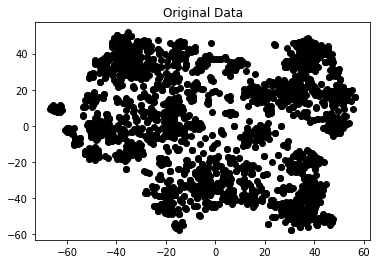

In [84]:
_, ax = plt.subplots()
ax.title.set_text('Original Data')
ax.scatter(X_embedded[:,0], X_embedded[:,1], c='black')

In [85]:
gmm = GMM(n_components=5, covariance_type='full', random_state=42)

In [86]:
preds = gmm.fit_predict(X)

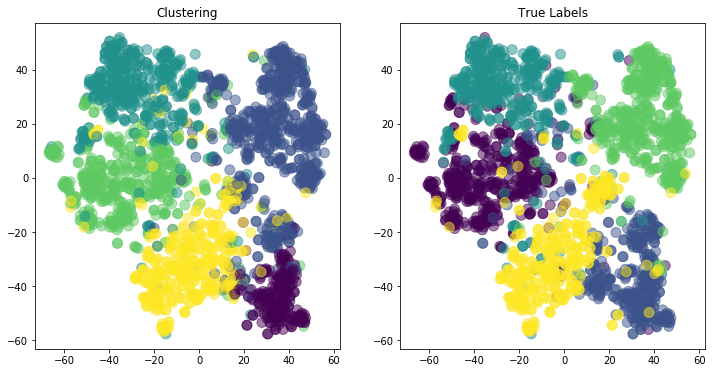

In [87]:
fig, axes = plt.subplots(1,2)
print(axes)
fig.set_figheight(6)
fig.set_figwidth(12)
axes[0].title.set_text('Clustering')
axes[0].scatter(X_embedded[:,0], X_embedded[:,1], c=preds, s=100, alpha=0.5)


le = preprocessing.LabelEncoder()
encoded_labels = le.fit_transform(labels)
axes[1].title.set_text('True Labels')
axes[1].scatter(X_embedded[:,0], X_embedded[:,1], c=encoded_labels, s=100, alpha=0.5)

In [ ]:
# note labels assigned in clustering differ from true labels, so you see colors are different in two shape